In [1]:
import sys
sys.path.append('../utils/')

from query import query_dataframe, query_dataframe_f, print_and_query

In [2]:
print_and_query('q1.sql')

SELECT COUNT(DISTINCT s.Ticker) as num_tickers
FROM XFDATA.dbo.SECURITY s

/*
num_tickers
76369
 */



,num_tickers
0,76369


In [3]:
print_and_query('q2.sql')

/*
If you forget the `DISTINCT` clause in counting, you get 7230 tickers,
not 6862. The problem specifically asks for unique tickers, so 7230 is an
incorrect answer.
 */

SELECT COUNT(DISTINCT s.Ticker) num_tickers
FROM XFDATA.dbo.SECURITY_PRICE sp
INNER JOIN XFDATA.dbo.SECURITY s ON sp.SecurityID = s.SecurityID
WHERE sp.Date = '2012-09-26'

/*
num_tickers
6862
 */


,num_tickers
0,6862


In [4]:
print_and_query('q3.sql')

SELECT TOP 200 *
FROM XFDATA.dbo.OPTION_PRICE_2002_02 op
  INNER JOIN XFDATA.dbo.SECURITY s ON op.SecurityID = s.SecurityID
  INNER JOIN XFDATA.dbo.SECURITY_PRICE sp on s.SecurityID = sp.SecurityID
WHERE s.Ticker = 'SLB'
      and sp.Date = '2002-02-12'
      AND op.Date = '2002-02-12'


,SecurityID,Date,Symbol,SymbolFlag,Strike,Expiration,CallPut,BestBid,BestOffer,LastTradeDate,...,Date,BidLow,AskHigh,ClosePrice,Volume,TotalReturn,AdjustmentFactor,OpenPrice,SharesOutstanding,AdjustmentFactor2
0,109956,2002-02-12,SLB.BH,0,40000,2002-02-16,C,14.800000,15.200000,2002-02-11,...,2002-02-12,54.599998,56.599998,55,3546000,-0.015396,2,55.799999,575720,2.16396
1,109956,2002-02-12,SLB.NH,0,40000,2002-02-16,P,0.000000,0.050000,2002-02-11,...,2002-02-12,54.599998,56.599998,55,3546000,-0.015396,2,55.799999,575720,2.16396
2,109956,2002-02-12,SLB.BI,0,45000,2002-02-16,C,9.900000,10.200000,2002-02-12,...,2002-02-12,54.599998,56.599998,55,3546000,-0.015396,2,55.799999,575720,2.16396
3,109956,2002-02-12,SLB.NI,0,45000,2002-02-16,P,0.000000,0.050000,2002-02-12,...,2002-02-12,54.599998,56.599998,55,3546000,-0.015396,2,55.799999,575720,2.16396
4,109956,2002-02-12,SLB.BJ,0,50000,2002-02-16,C,4.900000,5.200000,2002-02-12,...,2002-02-12,54.599998,56.599998,55,3546000,-0.015396,2,55.799999,575720,2.16396
5,109956,2002-02-12,SLB.NJ,0,50000,2002-02-16,P,0.050000,0.150000,2002-02-12,...,2002-02-12,54.599998,56.599998,55,3546000,-0.015396,2,55.799999,575720,2.16396
6,109956,2002-02-12,SLB.BK,0,55000,2002-02-16,C,0.850000,0.900000,2002-02-12,...,2002-02-12,54.599998,56.599998,55,3546000,-0.015396,2,55.799999,575720,2.16396
7,109956,2002-02-12,SLB.NK,0,55000,2002-02-16,P,0.800000,0.850000,2002-02-12,...,2002-02-12,54.599998,56.599998,55,3546000,-0.015396,2,55.799999,575720,2.16396
8,109956,2002-02-12,SLB.BL,0,60000,2002-02-16,C,0.000000,0.100000,2002-02-12,...,2002-02-12,54.599998,56.599998,55,3546000,-0.015396,2,55.799999,575720,2.16396
9,109956,2002-02-12,SLB.NL,0,60000,2002-02-16,P,4.800000,5.100000,2002-02-04,...,2002-02-12,54.599998,56.599998,55,3546000,-0.015396,2,55.799999,575720,2.16396


In [8]:
print_and_query('q4.sql')

SELECT COUNT(DISTINCT s.Ticker) as tickers, YEAR(sp.Date) as year
FROM XFDATA.dbo.SECURITY s
  INNER JOIN XFDATA.dbo.SECURITY_PRICE sp on s.SecurityID = sp.SecurityID

WHERE
  MONTH(sp.Date) = 1
  AND DAY(sp.Date) < 4
  AND s.IssueType = '0' /* Common Stock */

GROUP BY YEAR(sp.Date)



,tickers,year
0,3422,1996
1,3787,1997
2,3859,1998
3,3949,2000
4,4181,2001
5,4063,2002
6,3995,2003
7,3954,2004
8,4017,2005
9,4091,2006


# Question 5

Stuff goes here.

In [9]:
print_and_query('q6.sql')

SELECT CONVERT(FLOAT, op.Strike) / 1000 as Strike,
  op.Expiration,
  op.CallPut
FROM XFDATA.dbo.SECURITY s
  INNER JOIN XFDATA.dbo.OPTION_PRICE_2012_08 op ON s.SecurityID = op.SecurityID
WHERE s.Ticker = 'KO'
GROUP BY
  op.Expiration,
  op.CallPut,
  op.Strike



,Strike,Expiration,CallPut
0,55.00,2012-08-03,C
1,60.00,2012-08-03,C
2,65.00,2012-08-03,C
3,67.50,2012-08-03,C
4,70.00,2012-08-03,C
5,72.50,2012-08-03,C
6,75.00,2012-08-03,C
7,77.50,2012-08-03,C
8,80.00,2012-08-03,C
9,82.50,2012-08-03,C


# Question 7

SELECT
  sp.ClosePrice / sp.AdjustmentFactor as 'Adjusted Close',
  sp.Date
FROM XFDATA.dbo.SECURITY s
  INNER JOIN XFDATA.dbo.SECURITY_PRICE sp ON s.SecurityID = sp.SecurityID
WHERE s.Ticker = 'KO'
  AND sp.Date BETWEEN '2011-01-01' AND '2011-12-31'


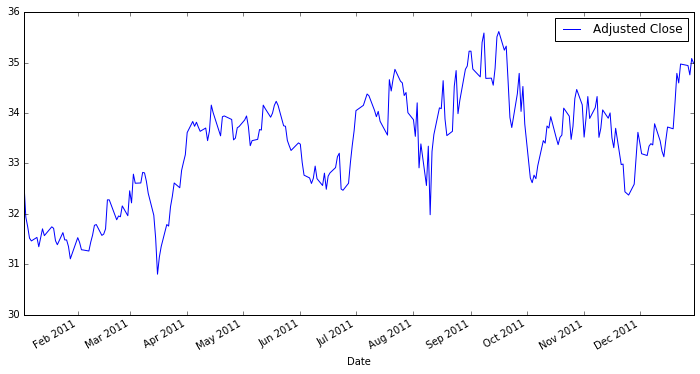

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

adj_close = print_and_query('q7_adj_close.sql')
adj_close.plot(x='Date', y='Adjusted Close')
plt.gcf().set_size_inches(12, 6)

SELECT
  sp.TotalReturn,
  sp.Date
FROM XFDATA.dbo.SECURITY s
  INNER JOIN XFDATA.dbo.SECURITY_PRICE sp ON s.SecurityID = sp.SecurityID
WHERE s.Ticker = 'KO'
  AND sp.Date BETWEEN '2011-01-01' AND '2011-12-31'


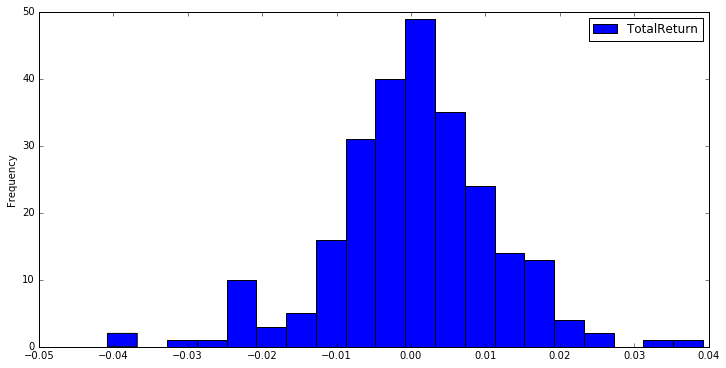

In [17]:
returns = print_and_query('q7_returns.sql')
returns.plot(x='Date', y='TotalReturn', kind='hist', bins=20)
plt.gcf().set_size_inches(12, 6)

In [18]:
print_and_query('q8.sql')

SELECT
  MIN(sp.ClosePrice) as min_price,
  MAX(SP.ClosePrice) as max_price,
  YEAR(sp.Date) as year,
  MONTH(sp.Date) as month

FROM XFDATA.dbo.SECURITY s
  INNER JOIN XFDATA.dbo.SECURITY_PRICE sp on s.SecurityID = sp.SecurityID
WHERE s.Ticker = 'KO'
GROUP BY YEAR(sp.Date), MONTH(sp.Date)
ORDER BY YEAR(sp.Date), month(sp.Date)


,min_price,max_price,year,month
0,72.750000,75.625000,1996,1
1,75.125000,84.000000,1996,2
2,80.250000,84.875000,1996,3
3,78.750000,84.250000,1996,4
4,43.000000,83.875000,1996,5
5,45.750000,49.125000,1996,6
6,45.500000,49.500000,1996,7
7,48.125000,52.000000,1996,8
8,50.000000,53.125000,1996,9
9,48.500000,50.500000,1996,10
